In [51]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

In [4]:
vaccinations = spark.read.load("./data/Vaccinations/", format="csv", header=True, inferSchema="True")
vaccinations.printSchema()

root
 |-- dep: string (nullable = true)
 |-- clage_vacsi: string (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: string (nullable = true)
 |-- n_cum_dose1: string (nullable = true)



vaccinations.groupBy(["dep", "clage_vacsi"]).sum("n_dose1").sort(["dep", "clage_vacsi"]).take(100)

# Nombre de vaccinées par tranche d'âge

In [26]:
vacc = spark.read.load("./data/Vaccinations/vacsi-a-dep-2021-02-03-20h15.csv", format="csv", header=True, inferSchema="True")
#vacc.printSchema()

In [27]:
newvacc = vacc.select(["clage_vacsi", "n_cum_dose1"])
#newvacc.collect()

In [28]:
nbVaccByAge = newvacc.where( newvacc.clage_vacsi != "0").groupBy("clage_vacsi").agg({"n_cum_dose1" : "max"}).sort(["clage_vacsi"])

In [29]:
nbVaccByAge.show()


+-----------+----------------+
|clage_vacsi|max(n_cum_dose1)|
+-----------+----------------+
|         24|             325|
|         29|             809|
|         39|            2218|
|         49|            3169|
|         59|            9925|
|         64|            4356|
|         69|            3364|
|         74|            3636|
|         79|            9318|
|         80|           17667|
+-----------+----------------+



In [30]:
nbVaccByAge.collect()


[Row(clage_vacsi=24, max(n_cum_dose1)=325),
 Row(clage_vacsi=29, max(n_cum_dose1)=809),
 Row(clage_vacsi=39, max(n_cum_dose1)=2218),
 Row(clage_vacsi=49, max(n_cum_dose1)=3169),
 Row(clage_vacsi=59, max(n_cum_dose1)=9925),
 Row(clage_vacsi=64, max(n_cum_dose1)=4356),
 Row(clage_vacsi=69, max(n_cum_dose1)=3364),
 Row(clage_vacsi=74, max(n_cum_dose1)=3636),
 Row(clage_vacsi=79, max(n_cum_dose1)=9318),
 Row(clage_vacsi=80, max(n_cum_dose1)=17667)]

In [31]:
type(nbVaccByAge)

pyspark.sql.dataframe.DataFrame

In [32]:
nbVaccByAge.show()


+-----------+----------------+
|clage_vacsi|max(n_cum_dose1)|
+-----------+----------------+
|         24|             325|
|         29|             809|
|         39|            2218|
|         49|            3169|
|         59|            9925|
|         64|            4356|
|         69|            3364|
|         74|            3636|
|         79|            9318|
|         80|           17667|
+-----------+----------------+



In [33]:
#Sauvegarder les données récupérées dans un csv
nbVaccByAge.toPandas().to_csv("./data/save/nb_vacc_by_age.csv", header=True, index=False)

In [34]:
#lire le csv sauvegardé

#nbVaccByAge_data = spark.read.load("./data/save/nb_vacc_by_age.csv", format="csv", header=True, inferSchema="True")

nbVaccByAge_data = pd.read_csv('./data/save/nb_vacc_by_age.csv')

In [35]:
type(nbVaccByAge_data)

pandas.core.frame.DataFrame

In [36]:
nbVaccByAge_data
df = nbVaccByAge_data
df

,clage_vacsi,max(n_cum_dose1)
0,24,325
1,29,809
2,39,2218
3,49,3169
4,59,9925
5,64,4356
6,69,3364
7,74,3636
8,79,9318
9,80,17667


In [48]:
#Récuperer les clés et valeurs du df pour le graphique
sizes = []
labels = []
explode = []

for i in range(len(df)):
    sizes.append(df["max(n_cum_dose1)"][i])
    labels.append(df["clage_vacsi"][i])
    explode.append(0.1)

#Configurer la variable explode
explode = tuple(explode)
explode

(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

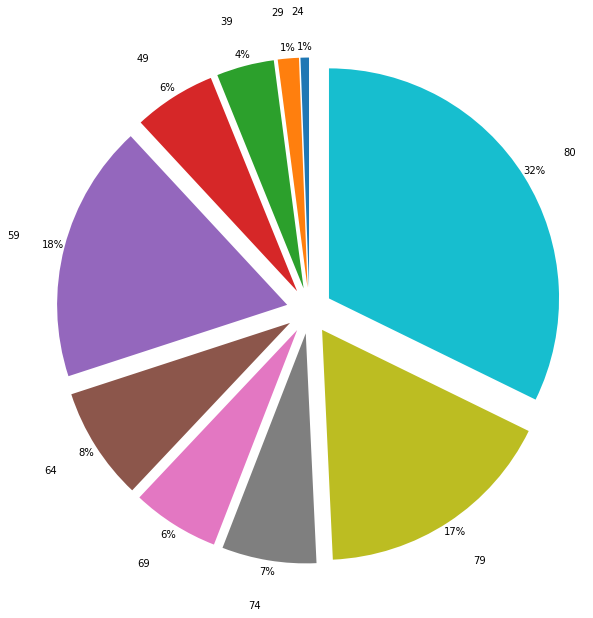

In [55]:
#Pie Chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%',
        pctdistance= 1.05,shadow=False,labeldistance=1.2, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(10,10)
